In [1]:
import nltk, re
import numpy as np
import pandas as pd
import sklearn
from nltk.tokenize import word_tokenize
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pprint, time
import pickle

In [2]:
with open('tagged_lines_df.pkl', 'rb') as f:
    poem_df = pickle.load(f)

In [3]:
poem_df = poem_df.drop(['author','title'], axis=1)

In [4]:
poem_df.head()

,words,length_in_words,lexical_diversity,pos_tags
1,[philosophic],1,1.000,[JJ]
1,"[in, its, complex, ovoid, emptiness]",5,1.000,"[IN, PRP$, JJ, JJ, NN]"
1,"[a, skillful, pundit, coined, it, as, a, sort]",8,0.875,"[DT, JJ, NN, VBD, PRP, IN, DT, NN]"
1,"[of, stopgap, doorstop, for, those]",5,1.000,"[IN, NN, VBP, IN, DT]"
1,"[quaint, equations]",2,1.000,"[NN, NNS]"


In [5]:
def clean_tags(tags):
    return [tag for tag in tags if tag.isalpha()]

poem_df['pos_tags'] = poem_df.pos_tags.map(clean_tags)

In [13]:
from sklearn.model_selection import train_test_split
poem_train, poem_test = train_test_split(poem_df, test_size=0.05, random_state=13)
print("Length of Training Set: ", len(poem_train))
print("Length of Test Set: ", len(poem_test))
print("-" * 120)
print("Training Data Overview:\n")
print(poem_train.head())

Length of Training Set:  461323
Length of Test Set:  24281
------------------------------------------------------------------------------------------------------------------------
Training Data Overview:

                                                   words  length_in_words  \
4638                     [they, found, a, weekold, baby]                5   
13381                                  [snow, continues]                2   
95     [implements, of, production, cooking, reserve,...               10   
15585                   [and, individual, freedom, mute]                4   
5242   [noises, seemed, echoes, as, i, continued, to,...                9   

       lexical_diversity                                    pos_tags  
4638                 1.0                      [PRP, VBD, DT, JJ, NN]  
13381                1.0                                   [NN, VBZ]  
95                   0.9  [NNS, IN, NN, NN, NN, NN, IN, DT, NN, VBG]  
15585                1.0                        

In [7]:
# train_tokens, train_tags = sum(poem_train.words.to_list(), []), sum(poem_train.pos_tags.to_list(),[])
# test_tokens, test_tags = sum(poem_test.words.to_list(), []), sum(poem_test.pos_tags.to_list(),[])

In [35]:
train_tokens, train_tags = poem_train.words.explode().to_list(), poem_train.pos_tags.explode().to_list()
test_tokens, test_tags = poem_test.words.explode().to_list(), poem_test.pos_tags.explode().to_list()

In [50]:
# test = [['these','are','hats'], ['these','are','not','hats']]
# print(test)
# print(flatten(test))
# print(pd.Series(train_tokens).map(len).describe())
print(train_tags[0:5])

['PRP', 'VBD', 'DT', 'JJ', 'NN']


In [64]:
train_vocab = set(tuple([token for token in train_tokens if (len(token) > 1 or token in ['a','i','u','x'])]))
train_tag_tups = tuple([''.join(str(item)) for item in train_tags])
train_tagset = set(train_tag_tups)

In [69]:
print(len(train_tagset))
print(len(train_vocab))

40
107563


In [66]:
token_freq = nltk.FreqDist(train_tokens)

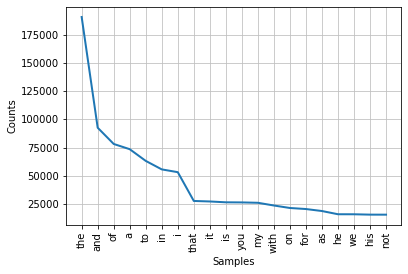

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [67]:
token_freq.plot(20, cumulative=False)

In [44]:
pos_freq = nltk.FreqDist(train_tags)

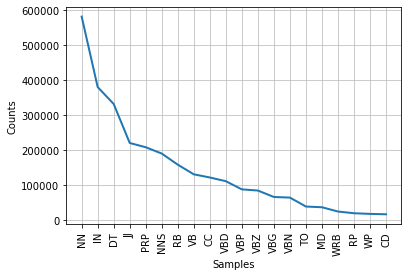

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [45]:
pos_freq.plot(20, cumulative=False)

In [77]:
print(f"Size --------------- \nVocabulary: {len(train_vocab)} \nTagset: {len(train_tagset)}")
print("\nAvailable Tags ----- \n")
print(train_tagset)

Size --------------- 
Vocabulary: 107563 
Tagset: 40

Available Tags ----- 

{'AFX', 'NFP', 'DT', 'HYPH', 'RB', 'NNS', 'JJS', 'VBZ', 'NN', 'PDT', 'PRP', 'FW', 'nan', 'CD', 'POS', 'VB', 'NNP', 'XX', 'VBN', 'WDT', 'MD', 'VBP', 'LS', 'EX', 'JJ', 'NNPS', 'WRB', 'WP', 'RBR', 'VBD', 'JJR', 'VBG', 'UH', 'RBS', 'RP', 'SYM', 'CC', 'IN', 'TO', 'ADD'}


In [78]:
# P(w/t)
len_pos_tags = 
len_vocab = 

word_given_tag = np.zeros((len(train_tagset), len(train_vocab)))

In [ ]:
# emission probability
